Kode di bawah buat download datasetnya

In [1]:
! pip install -q kaggle

In [ ]:
import os
from google.colab import files
files.upload()


In [9]:
! mkdir "/content/kaggle"

In [11]:
! cp "/content/kaggle.json" "/content/kaggle/"

In [13]:
! chmod 600 "/content/kaggle/kaggle.json"

In [ ]:
! kaggle datasets download -d minhhuy2810/rice-diseases-image-dataset

In [15]:
! mkdir "/content/kaggle/datasets"

In [16]:
! cp "/content/rice-diseases-image-dataset.zip" "/content/kaggle/datasets"

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/kaggle"
%cd /content/kaggle/datasets/

In [ ]:
!unzip \*.zip  && rm *.zip

# MACHINE LEARNING STARTS HERE

In [21]:
Training_dir = os.path.join("/content/kaggle/datasets/RiceDiseaseDataset/train")
Testing_dir = os.path.join("/content/kaggle/datasets/RiceDiseaseDataset/validation")
brownspot_dir = os.path.join("/content/kaggle/datasets/RiceDiseaseDataset/train/BrownSpot")
healthy_dir = os.path.join("/content/kaggle/datasets/RiceDiseaseDataset/train/Healthy")
hispa_dir = os.path.join("/content/kaggle/datasets/RiceDiseaseDataset/train/Hispa")
leafblast_dir = os.path.join("/content/kaggle/datasets/RiceDiseaseDataset/train/LeafBlast")
brownspot_files = os.listdir(brownspot_dir)
healthy_files = os.listdir(healthy_dir)
hispa_files = os.listdir(hispa_dir)
leafblast_files = os.listdir(leafblast_dir)


In [22]:
print('total training brown spot:', len(os.listdir(brownspot_dir)))
print('total training healthy:', len(os.listdir(healthy_dir)))
print('total training hispa:', len(os.listdir(hispa_dir)))
print('total training leaf blast:', len(os.listdir(leafblast_dir)))

total training brown spot: 400
total training healthy: 400
total training hispa: 400
total training leaf blast: 400


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_brownspot = [os.path.join(brownspot_dir, fname) 
                for fname in brownspot_files[pic_index-2:pic_index]]
next_healthy = [os.path.join(healthy_dir, fname) 
                for fname in healthy_files[pic_index-2:pic_index]]
next_hispa = [os.path.join(hispa_dir, fname) 
                for fname in hispa_files[pic_index-2:pic_index]]
next_leafblast = [os.path.join(leafblast_dir, fname) 
                for fname in leafblast_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_brownspot+next_healthy+next_hispa+next_leafblast):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [24]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [25]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	Training_dir,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=32
)
validation_generator = validation_datagen.flow_from_directory(
	Testing_dir,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=32
)

Found 1600 images belonging to 4 classes.
Found 492 images belonging to 4 classes.


In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

In [28]:
loss_param = "categorical_crossentropy"
EPOCHS = 40
optim = Adam(lr=0.0001, decay=0.0001 / EPOCHS)
steps = 1600 // 32

In [29]:
model.compile(loss = loss_param, optimizer= optim, metrics=['accuracy'])
history = model.fit(train_generator, epochs=EPOCHS, steps_per_epoch=steps, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/40
50/50 [==============================] - 221s 4s/step - loss: 1.3902 - accuracy: 0.2577 - val_loss: 1.3793 - val_accuracy: 0.3021
Epoch 2/40
50/50 [==============================] - 176s 4s/step - loss: 1.3625 - accuracy: 0.3486 - val_loss: 1.2361 - val_accuracy: 0.4688
Epoch 3/40
50/50 [==============================] - 165s 3s/step - loss: 1.2210 - accuracy: 0.4366 - val_loss: 1.3203 - val_accuracy: 0.3958
Epoch 4/40
50/50 [==============================] - 166s 3s/step - loss: 1.2293 - accuracy: 0.3776 - val_loss: 1.2049 - val_accuracy: 0.4479
Epoch 5/40
50/50 [==============================] - 164s 3s/step - loss: 1.1695 - accuracy: 0.4443 - val_loss: 1.3884 - val_accuracy: 0.3646
Epoch 6/40
50/50 [==============================] - 163s 3s/step - loss: 1.1903 - accuracy: 0.4545 - val_loss: 1.2189 - val_accuracy: 0.3750
Epoch 7/40
50/50 [==============================] - 163s 3s/step - loss: 1.1541 - accuracy: 0.4614 - val_loss: 1.2294 - val_accuracy: 0.4375
Epoch 8/40
50

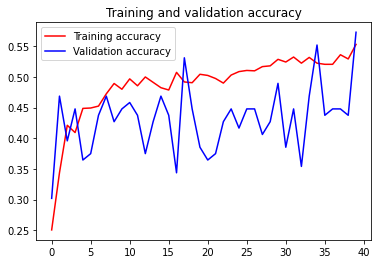

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()